In [75]:
import matplotlib.pyplot as plt

import openmc
from openmc.deplete import Results
from openmc.deplete.abc import _SECONDS_PER_MINUTE, _SECONDS_PER_HOUR, _SECONDS_PER_DAY
integrator_types = ('predictor', 'cecm')
time_types = [('minutes', _SECONDS_PER_MINUTE, 'minutes'), 
              ('hours', _SECONDS_PER_HOUR, 'hours'),
              ('days', _SECONDS_PER_DAY, 'days'),
              ('months', _SECONDS_PER_DAY, 'days')]
normalization_types = ('source_rate', 'fission_q')
depletion_types = [('simple', '../openmc/tests/chain_simple.xml'), ('full', 'chain_endbf71_pwr.xml')]


In [94]:
time_type = 0
integrator_type = 0
normalization_type = 0
depletion_type = 1

time_type, time_scale_factor, time_unit = time_types[time_type]
integrator_type = integrator_types[integrator_type]
normalization_type = normalization_types[normalization_type]
depletion_type, chain_file = depletion_types[depletion_type]

case1_results = Results(f'case1/{integrator_type}/{depletion_type}_depletion_results_{time_type}.h5')
case2_results = Results(f'case2/{integrator_type}/{depletion_type}_depletion_results_{time_type}.h5')

path = f'case3/{integrator_type}/{depletion_type}_depletion_results_{time_type}_'
case3_results = Results()
for i in range(0,11):
    case3_results.append(Results(path + f'{i}.h5')[0])

t = results0[0].time
for i, res in enumerate(case3_results):
    times = [0,0]
    times[0] = t[1] * i
    times[1] = t[1] * (i+1)
    res.time = times
        
time, _ = case1_results.get_atoms("1", "U235")
time /= time_scale_factor
chain = openmc.deplete.Chain.from_xml(chain_file)

atoms_dict = {}
rx_dict = {}
for nuc in chain.nuclides:
    nuc_name = nuc.name
    atoms = (case1_results.get_atoms("1", nuc_name)[1], 
             case2_results.get_atoms("1", nuc_name)[1],
             case3_results.get_atoms("1", nuc_name)[1])
    atoms_dict[nuc_name] = atoms
    rx_dict.update({nuc_name: {}})
    for rx in nuc.reactions:
        rx_name = rx.type
        reactions = (case1_results.get_reaction_rate('1', nuc_name, rx_name)[1],
                     case2_results.get_reaction_rate('1', nuc_name, rx_name)[1],
                     case3_results.get_reaction_rate('1', nuc_name, rx_name)[1])
        rx_dict[nuc_name].update({rx_name: reactions})
        
atoms_dict.keys()

dict_keys(['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'He3', 'He4', 'He5', 'He6', 'He7', 'He8', 'He9', 'He10', 'Li4', 'Li5', 'Li6', 'Li7', 'Li8', 'Li9', 'Li10', 'Li11', 'Li12', 'Be5', 'Be6', 'Be8', 'Be9', 'Be10', 'Be11', 'Be12', 'Be13', 'Be14', 'Be15', 'Be16', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'N10', 'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24', 'N25', 'O12', 'O13', 'O14', 'O15', 'O16', 'O17', 'O18', 'O19', 'O20', 'O21', 'O22', 'O23', 'O24', 'O25', 'O26', 'O27', 'O28', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'Ne16', 'Ne17', 'Ne18', 'Ne19', 'Ne20', 'Ne21', 'Ne22', 'Ne23', 'Ne24', 'Ne25', 'Ne26', 'Ne27', 'Ne28', 'Ne29', 'Ne30', 'Ne31', 'Ne32', 'Ne33', 'Ne34', 'Na18', 'Na19', 'Na20', 'Na21', 'N

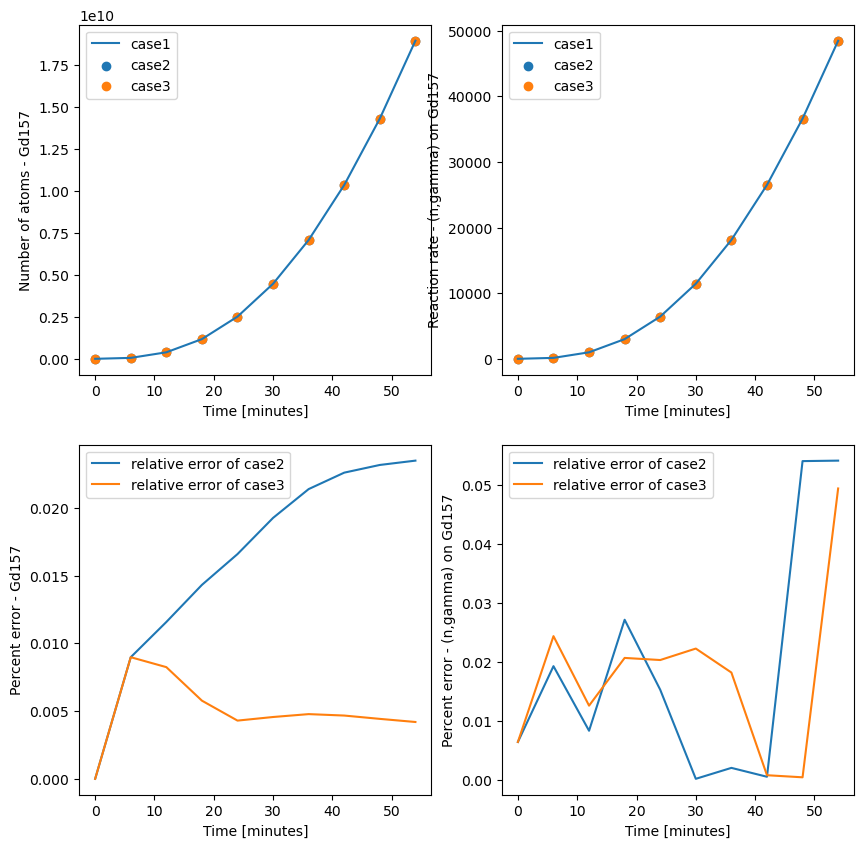

In [145]:
nuc = 'Gd157'
rx = '(n,gamma)'
i = -1
j = -1
c1_atoms, c2_atoms, c3_atoms = atoms_dict[nuc]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

ax1.plot(time[:i], c1_atoms[:i], label="case1")
ax1.scatter(time[:i], c2_atoms[:i], label="case2")
ax1.scatter(time[:i], c3_atoms[:i], label="case3")
ax1.set_xlabel(f"Time [{time_unit}]")
ax1.set_ylabel(f"Number of atoms - {nuc}");
ax1.legend()

at_error21 = 100 * abs((c2_atoms - c1_atoms) / c1_atoms)
at_error31 = 100 * abs((c3_atoms - c1_atoms) / c1_atoms)
at_error23 = 100 * abs((c2_atoms - c3_atoms) / c3_atoms)
ax3.plot(time[:j], at_error21[:j], label="relative error of case2")
ax3.plot(time[:j], at_error31[:j], label="relative error of case3")
ax3.set_xlabel(f"Time [{time_unit}]")
ax3.set_ylabel(f"Percent error - {nuc}")
ax3.legend()

if len(chain.nuclides[chain.nuclide_dict[nuc]].reactions) != 0:
    c1_nuc_rx, c2_nuc_rx, c3_nuc_rx = rx_dict[nuc][rx]
    ax2.plot(time[:i], c1_nuc_rx[:i], label="case1")
    ax2.scatter(time[:i], c2_nuc_rx[:i], label="case2")
    ax2.scatter(time[:i], c3_nuc_rx[:i], label="case3")
    ax2.set_xlabel(f"Time [{time_unit}]")
    ax2.set_ylabel(f"Reaction rate - {rx} on {nuc}");
    ax2.legend()

    rx_error21 = abs(100 * (c2_nuc_rx - c1_nuc_rx) / c1_nuc_rx)
    rx_error31 = abs(100 * (c3_nuc_rx - c1_nuc_rx) / c1_nuc_rx)
    rx_error23 = abs(100 * (c2_nuc_rx - c3_nuc_rx) / c3_nuc_rx)
    ax4.plot(time[:j], rx_error21[:j], label="relative error of case2")
    ax4.plot(time[:j], rx_error31[:j], label="relative error of case3")
    ax4.set_xlabel(f"Time [{time_unit}]")
    ax4.set_ylabel(f"Percent error - {rx} on {nuc}")
    ax4.legend()

In [135]:
actinides = ['U234',
             'U235',
             'U236',
             'U238',
             'U239',
             'Np239',
             'Pu238',
             'Pu240',
             'Pu241',
             'Pu242',
             'Am241',
             'Am242',
             'Am242_m1',
             'Am243',
             'Am244',
             'Cm242',
             'Cm243',
             'Cm244',
             'Cm245',
             'Cm246'
]

fps = ['Kr85',
       'Sr90',
       'Y90',
       'Zr93',
       'Mo95',
       'Mo97',
       'Tc99',
       'Ru101',
       'Ru106',
       'Rh103',
       'Pd105',
       'Pd107',
       'Ag109',
       'Te132',
       'I129',
       'I131',
       'Xe131',
       'Xe135',
       'Cs133',
       'Cs134',
       'Cs135',
       'Cs137',
       'La139',
       'Ce142',
       'Nd143',
       'Pm147',
       'Sm149',
       'Sm151'
]